In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | paso de carrasco
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | atasu
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | haveloc

Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | sao lourenco do sul
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | belyy yar
Processing Record 42 of Set 4 | axim
Processing Record 43 of Set 4 | palmer
Processing Record 44 of Set 4 | abu samrah
Processing Record 45 of Set 4 | basco
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | chernyshevskiy
Processing Record 48 of Set 4 | baykit
Processing Record 49 of Set 4 | qaqortoq
Processing Record 50 of Set 4 | shimoda
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | vitimskiy
City not found. Skipping...
Processing Record 5 of Set 5 | berdigestyakh
Processing Record 6 of Set 5 | channel-port aux basques
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | hami
Processing Record 9 of Set 5 | 

Processing Record 27 of Set 8 | springfield
Processing Record 28 of Set 8 | kijang
Processing Record 29 of Set 8 | tual
Processing Record 30 of Set 8 | auxerre
Processing Record 31 of Set 8 | tsiroanomandidy
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | marsabit
Processing Record 34 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 8 | ransang
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | lamu
Processing Record 38 of Set 8 | tshikapa
Processing Record 39 of Set 8 | taiyuan
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | paiho
City not found. Skipping...
Processing Record 42 of Set 8 | taltal
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | carnarvon
Processing Record 45 of Set 8 | ypsonas
Processing Record 46 of Set 8 | la peca
Processing Record 47 of Set 8 | tocopilla
Processing Record 48 of Set 8 | codrington
Processing Record 49 of S

Processing Record 15 of Set 12 | portland
Processing Record 16 of Set 12 | moose factory
Processing Record 17 of Set 12 | chino valley
Processing Record 18 of Set 12 | andradina
Processing Record 19 of Set 12 | la crosse
Processing Record 20 of Set 12 | sal rei
Processing Record 21 of Set 12 | soanierana ivongo
Processing Record 22 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 23 of Set 12 | denpasar
Processing Record 24 of Set 12 | preobrazheniye
Processing Record 25 of Set 12 | kindia
Processing Record 26 of Set 12 | olinda
Processing Record 27 of Set 12 | terrace
Processing Record 28 of Set 12 | mangrol
Processing Record 29 of Set 12 | chateaubelair
Processing Record 30 of Set 12 | dzilam gonzalez
Processing Record 31 of Set 12 | tautira
Processing Record 32 of Set 12 | paris
Processing Record 33 of Set 12 | san patricio
Processing Record 34 of Set 12 | xichang
Processing Record 35 of Set 12 | markdale
Processing Record 36 of Set 12 | boa vista
Processing Reco

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,73.45,94,75,2.30,CK,2022-09-28 16:44:03
1,Kapaa,22.0752,-159.3190,73.38,83,40,4.61,US,2022-09-28 16:45:31
2,Talnakh,69.4865,88.3972,21.25,79,39,3.78,RU,2022-09-28 16:44:16
3,Beringovskiy,63.0500,179.3167,31.84,83,99,16.91,RU,2022-09-28 16:44:17
4,Paso De Carrasco,-34.8603,-56.0522,61.25,59,0,14.97,UY,2022-09-28 16:47:24
5,Longyearbyen,78.2186,15.6401,35.44,93,75,3.44,SJ,2022-09-28 16:44:32
6,Kodiak,57.7900,-152.4072,51.31,93,100,13.80,US,2022-09-28 16:47:25
7,La Ronge,55.1001,-105.2842,61.02,51,20,4.61,CA,2022-09-28 16:45:38
8,Port Alfred,-33.5906,26.8910,62.19,94,92,1.99,ZA,2022-09-28 16:41:35
9,Bandarbeyla,9.4942,50.8122,77.85,86,15,22.50,SO,2022-09-28 16:46:46


In [22]:
#Reorder DataFrame
new_column_order = ["City","Country","Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-09-28 16:44:03,-21.2078,-159.7750,73.45,94,75,2.30
1,Kapaa,US,2022-09-28 16:45:31,22.0752,-159.3190,73.38,83,40,4.61
2,Talnakh,RU,2022-09-28 16:44:16,69.4865,88.3972,21.25,79,39,3.78
3,Beringovskiy,RU,2022-09-28 16:44:17,63.0500,179.3167,31.84,83,99,16.91
4,Paso De Carrasco,UY,2022-09-28 16:47:24,-34.8603,-56.0522,61.25,59,0,14.97
5,Longyearbyen,SJ,2022-09-28 16:44:32,78.2186,15.6401,35.44,93,75,3.44
6,Kodiak,US,2022-09-28 16:47:25,57.7900,-152.4072,51.31,93,100,13.80
7,La Ronge,CA,2022-09-28 16:45:38,55.1001,-105.2842,61.02,51,20,4.61
8,Port Alfred,ZA,2022-09-28 16:41:35,-33.5906,26.8910,62.19,94,92,1.99
9,Bandarbeyla,SO,2022-09-28 16:46:46,9.4942,50.8122,77.85,86,15,22.50


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

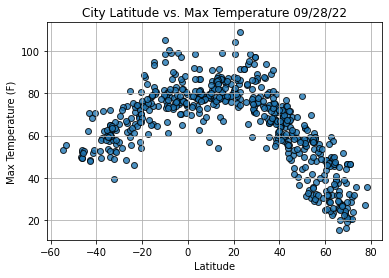

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

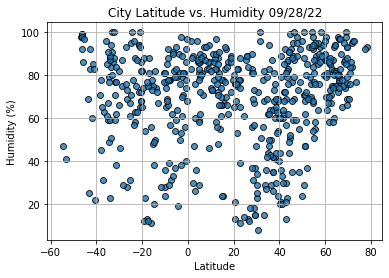

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

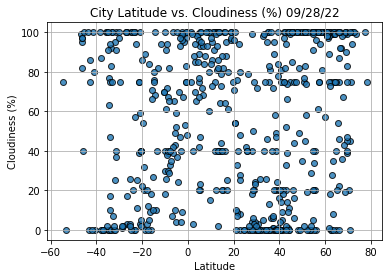

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

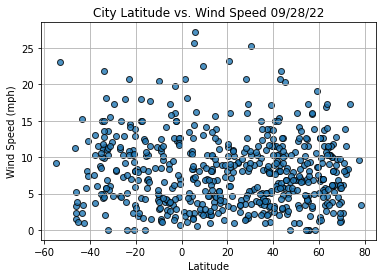

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()